In [86]:
    # Gender: Gender
    # Age: Age
    # Height : in metres
    # Weight : in kgs
    # family_history : Has a family member suffered or suffers from overweight?
    # FAVC : Do you eat high caloric food frequently?
    # FCVC : Do you usually eat vegetables in your meals?
    # NCP : How many main meals do you have daily?
    # CAEC : Do you eat any food between meals?
    # SMOKE : Do you smoke?
    # CH2O : How much water do you drink daily?
    # SCC : Do you monitor the calories you eat daily?
    # FAF: How often do you have physical activity?
    # TUE : How much time do you use technological devices such as cell phone, videogames, television, computer and others?
    # CALC : How often do you drink alcohol?
    # MTRANS : Which transportation do you usually use?
    # Obesity_level (Target Column) : Obesity level

In [36]:
import pandas as pd
podaci = pd.read_csv('Obesity.csv')
podaci.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [37]:
print(podaci['Obesity'].value_counts())

Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [38]:
# Dodavanje novog stupca
podaci['Pretilo'] = podaci['Obesity'].str.contains('Obesity').astype(int)

print(podaci['Pretilo'].value_counts())


Pretilo
0    1139
1     972
Name: count, dtype: int64


In [39]:
print(podaci.dtypes)

Gender             object
Age               float64
Height            float64
Weight            float64
family_history     object
FAVC               object
FCVC              float64
NCP               float64
CAEC               object
SMOKE              object
CH2O              float64
SCC                object
FAF               float64
TUE               float64
CALC               object
MTRANS             object
Obesity            object
Pretilo             int64
dtype: object


In [40]:
kategorijske_kolone = ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# https://www.geeksforgeeks.org/one-hot-encoding-vs-label-encoding/
podaci = pd.get_dummies(podaci, columns=kategorijske_kolone, drop_first=True)

In [41]:
print(podaci.head())

    Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE              Obesity  \
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0        Normal_Weight   
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0        Normal_Weight   
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0        Normal_Weight   
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0   Overweight_Level_I   
4  22.0    1.78    89.8   2.0  1.0   2.0  0.0  0.0  Overweight_Level_II   

   Pretilo  ...  CAEC_no  SMOKE_yes  SCC_yes  CALC_Frequently  CALC_Sometimes  \
0        0  ...    False      False    False            False           False   
1        0  ...    False       True     True            False            True   
2        0  ...    False      False    False             True           False   
3        0  ...    False      False    False             True           False   
4        0  ...    False      False    False            False            True   

   CALC_no  MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Trans

In [42]:
print(podaci.dtypes)

Age                             float64
Height                          float64
Weight                          float64
FCVC                            float64
NCP                             float64
CH2O                            float64
FAF                             float64
TUE                             float64
Obesity                          object
Pretilo                           int64
Gender_Male                        bool
family_history_yes                 bool
FAVC_yes                           bool
CAEC_Frequently                    bool
CAEC_Sometimes                     bool
CAEC_no                            bool
SMOKE_yes                          bool
SCC_yes                            bool
CALC_Frequently                    bool
CALC_Sometimes                     bool
CALC_no                            bool
MTRANS_Bike                        bool
MTRANS_Motorbike                   bool
MTRANS_Public_Transportation       bool
MTRANS_Walking                     bool


In [43]:
X = podaci.drop(columns=['Obesity', 'Pretilo', 'Weight'])
y = podaci['Pretilo']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)
X_train.head()

,Age,Height,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_yes,FAVC_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
162,21.000000,1.630000,3.000000,3.000000,2.000000,2.000000,0.000000,False,True,True,...,False,True,False,False,True,False,False,False,True,False
2001,20.924956,1.752531,3.000000,3.000000,2.887659,1.480919,0.779641,False,True,True,...,False,False,False,False,True,False,False,False,True,False
1435,22.899740,1.661715,1.203754,1.355354,2.765593,0.128342,1.659476,False,True,True,...,False,False,False,False,True,False,False,False,True,False
649,21.837996,1.588046,3.000000,1.696080,2.550307,1.098862,0.000000,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1280,25.994746,1.811602,3.000000,3.000000,2.858171,1.813318,0.680215,True,True,True,...,False,False,False,False,True,False,False,False,True,False


In [45]:
# Skaliranje MinMax
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


Točnost: 95.04%


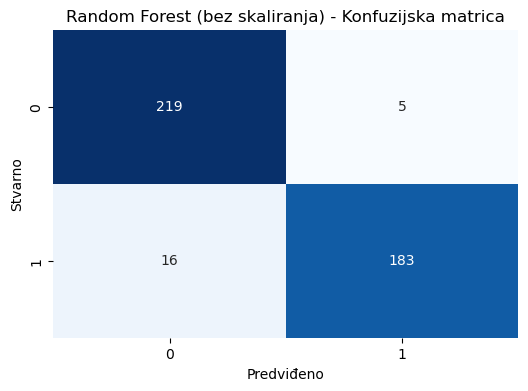

Točnost: 95.04%


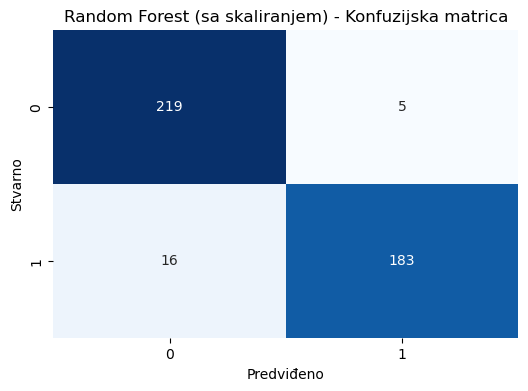

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 1. RandomForest - Bez skaliranja
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(f"Točnost: {accuracy_score(y_test, y_pred_rf):.2%}")

# Konfuzijska matrica
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Random Forest (bez skaliranja) - Konfuzijska matrica")
plt.xlabel('Predviđeno')
plt.ylabel('Stvarno')
plt.show()

# 2. RandomForest - Sa skaliranjem
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model_scaled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_scaled.fit(X_train_scaled, y_train)
y_pred_rf_scaled = rf_model_scaled.predict(X_test_scaled)

print(f"Točnost: {accuracy_score(y_test, y_pred_rf_scaled):.2%}")

# Konfuzijska matrica
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_scaled), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Random Forest (sa skaliranjem) - Konfuzijska matrica")
plt.xlabel('Predviđeno')
plt.ylabel('Stvarno')
plt.show()

XGBoost (bez skaliranja) - Točnost: 92.20%


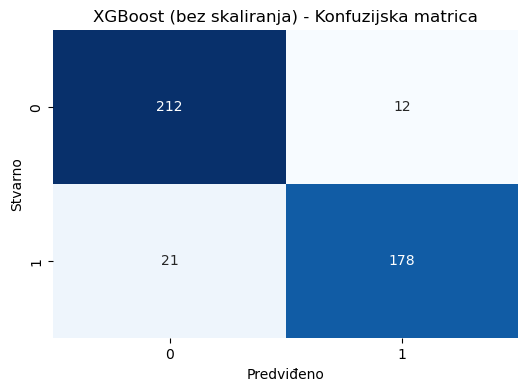


XGBoost (sa skaliranjem) - Točnost: 92.20%


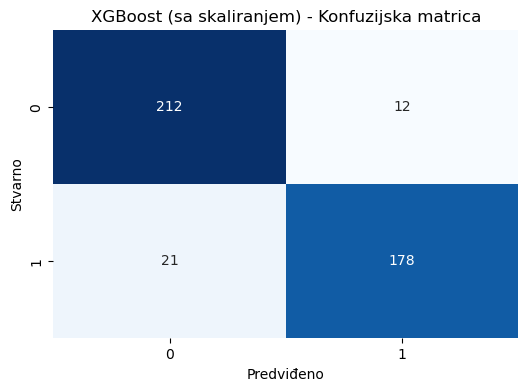

In [47]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. xgboost - Bez skaliranjem
# Konverzija u DMatrix bez skaliranja
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Parametri
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'eta': 0.3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Treniranje
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# Predikcija
y_pred_proba = xgb_model.predict(dtest)
y_pred = [1 if p > 0.5 else 0 for p in y_pred_proba]

# Točnost i konfuzijska matrica
print(f"XGBoost (bez skaliranja) - Točnost: {accuracy_score(y_test, y_pred):.2%}")

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("XGBoost (bez skaliranja) - Konfuzijska matrica")
plt.xlabel('Predviđeno')
plt.ylabel('Stvarno')
plt.show()

# 2. xgboost - sa skaliranjem

# Konverzija u DMatrix sa skaliranim podacima
dtrain_scaled = xgb.DMatrix(X_train_scaled, label=y_train)
dtest_scaled = xgb.DMatrix(X_test_scaled, label=y_test)

# Treniranje
xgb_model_scaled = xgb.train(params, dtrain_scaled, num_rounds)

# Predikcija
y_pred_proba_scaled = xgb_model_scaled.predict(dtest_scaled)
y_pred_scaled = [1 if p > 0.5 else 0 for p in y_pred_proba_scaled]

# Točnost i konfuzijska matrica
print(f"\nXGBoost (sa skaliranjem) - Točnost: {accuracy_score(y_test, y_pred_scaled):.2%}")

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_scaled), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("XGBoost (sa skaliranjem) - Konfuzijska matrica")
plt.xlabel('Predviđeno')
plt.ylabel('Stvarno')
plt.show()


Točnost: 89.36%


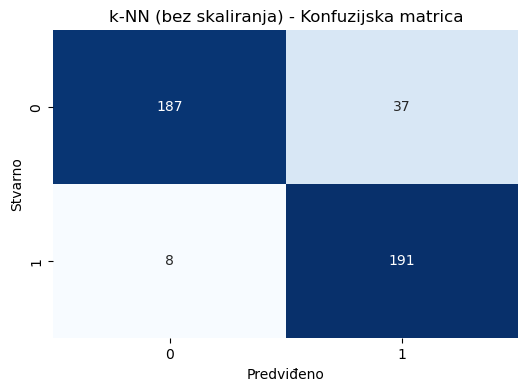

Točnost: 90.31%


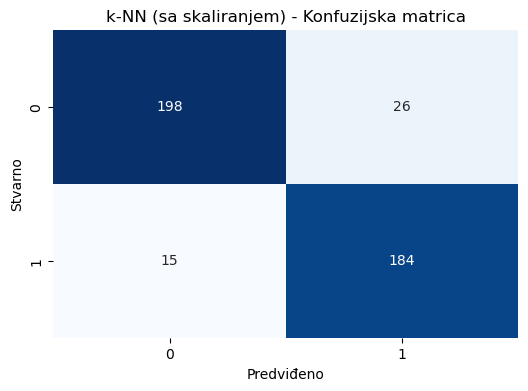

In [48]:
from sklearn.neighbors import KNeighborsClassifier

# 1. k-NN - Bez skaliranja
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print(f"Točnost: {accuracy_score(y_test, y_pred_knn):.2%}")

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("k-NN (bez skaliranja) - Konfuzijska matrica")
plt.xlabel('Predviđeno')
plt.ylabel('Stvarno')
plt.show()

# 2. k-NN - Sa skaliranjem
knn_model_scaled = KNeighborsClassifier(n_neighbors=5)
knn_model_scaled.fit(X_train_scaled, y_train)
y_pred_knn_scaled = knn_model_scaled.predict(X_test_scaled)

print(f"Točnost: {accuracy_score(y_test, y_pred_knn_scaled):.2%}")

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn_scaled), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("k-NN (sa skaliranjem) - Konfuzijska matrica")
plt.xlabel('Predviđeno')
plt.ylabel('Stvarno')
plt.show()


Točnost: 80.38%


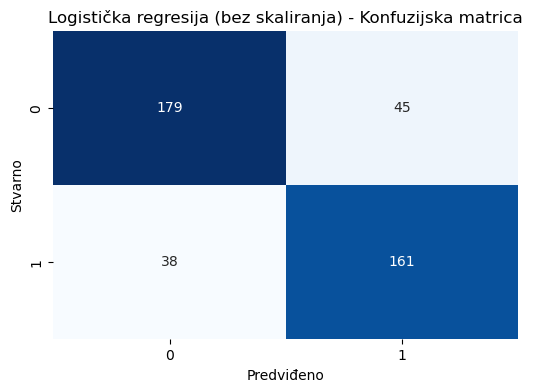

Točnost: 80.85%


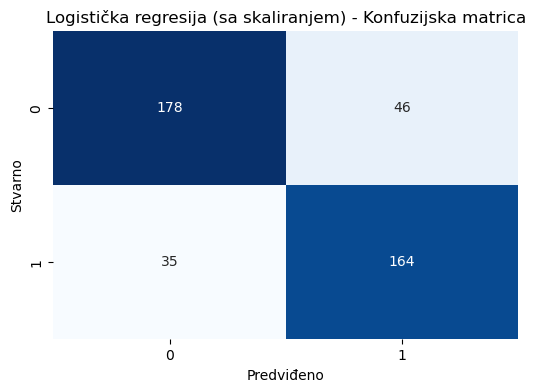

In [49]:
from sklearn.linear_model import LogisticRegression

# 1. Logistic Regression - Bez skaliranja
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print(f"Točnost: {accuracy_score(y_test, y_pred_lr):.2%}")

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Logistička regresija (bez skaliranja) - Konfuzijska matrica")
plt.xlabel('Predviđeno')
plt.ylabel('Stvarno')
plt.show()

# 2. Logistic Regression - Sa skaliranjem
lr_model_scaled = LogisticRegression(max_iter=1000)
lr_model_scaled.fit(X_train_scaled, y_train)
y_pred_lr_scaled = lr_model_scaled.predict(X_test_scaled)

print(f"Točnost: {accuracy_score(y_test, y_pred_lr_scaled):.2%}")

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr_scaled), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Logistička regresija (sa skaliranjem) - Konfuzijska matrica")
plt.xlabel('Predviđeno')
plt.ylabel('Stvarno')
plt.show()


In [50]:
# NEURONSKE MREŽE

Epoch 1/10
106/106 [==============================] - 0s 510us/step - loss: 0.6679 - accuracy: 0.6238
Epoch 2/10
106/106 [==============================] - 0s 583us/step - loss: 0.5533 - accuracy: 0.7145
Epoch 3/10
106/106 [==============================] - 0s 515us/step - loss: 0.4869 - accuracy: 0.7607
Epoch 4/10
106/106 [==============================] - 0s 523us/step - loss: 0.4634 - accuracy: 0.7767
Epoch 5/10
106/106 [==============================] - 0s 524us/step - loss: 0.4462 - accuracy: 0.7938
Epoch 6/10
106/106 [==============================] - 0s 512us/step - loss: 0.4219 - accuracy: 0.7932
Epoch 7/10
106/106 [==============================] - 0s 514us/step - loss: 0.4086 - accuracy: 0.8110
Epoch 8/10
106/106 [==============================] - 0s 502us/step - loss: 0.3914 - accuracy: 0.8217
Epoch 9/10
106/106 [==============================] - 0s 476us/step - loss: 0.3793 - accuracy: 0.8229
Epoch 10/10
14/14 [==============================] - 0s 276us/step

Točnost prve n

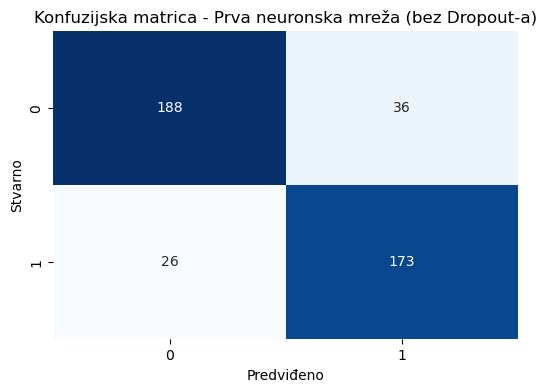

In [51]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# PRVA NEURONSKA MREŽA (BEZ DROPOUT-A)

model1 = Sequential()
model1.add(Dense(input_dim=X_train_scaled.shape[1], units=15))
model1.add(Dense(units=35, activation='tanh'))
model1.add(Dense(units=20, activation='swish'))
model1.add(Dense(units=10, activation='relu'))
model1.add(Dense(units=1, activation='sigmoid'))

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(X_train_scaled, y_train, batch_size=16, epochs=10, verbose=1)

y_pred1 = (model1.predict(X_test_scaled) > 0.5).astype(int)
y_pred1 = y_pred1.reshape(1, -1)[0]

acc1 = accuracy_score(y_test, y_pred1)
print(f"\nTočnost prve neuronske mreže (bez Dropout-a): {acc1:.2%}")

# Konfuzijska matrica
cm1 = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(6, 4))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Konfuzijska matrica - Prva neuronska mreža (bez Dropout-a)")
plt.xlabel('Predviđeno')
plt.ylabel('Stvarno')
plt.show()



Epoch 1/20
53/53 [==============================] - 0s 491us/step - loss: 0.6558 - accuracy: 0.5966
Epoch 2/20
53/53 [==============================] - 0s 587us/step - loss: 0.5600 - accuracy: 0.7008
Epoch 3/20
53/53 [==============================] - 0s 627us/step - loss: 0.5216 - accuracy: 0.7358
Epoch 4/20
53/53 [==============================] - 0s 623us/step - loss: 0.4933 - accuracy: 0.7660
Epoch 5/20
53/53 [==============================] - 0s 625us/step - loss: 0.4725 - accuracy: 0.7684
Epoch 6/20
53/53 [==============================] - 0s 633us/step - loss: 0.4615 - accuracy: 0.7927
Epoch 7/20
53/53 [==============================] - 0s 656us/step - loss: 0.4478 - accuracy: 0.7850
Epoch 8/20
53/53 [==============================] - 0s 654us/step - loss: 0.4300 - accuracy: 0.7986
Epoch 9/20
53/53 [==============================] - 0s 659us/step - loss: 0.4173 - accuracy: 0.8039
Epoch 10/20
53/53 [==============================] - 0s 647us/step - loss: 0.4204 - accuracy: 0.8081

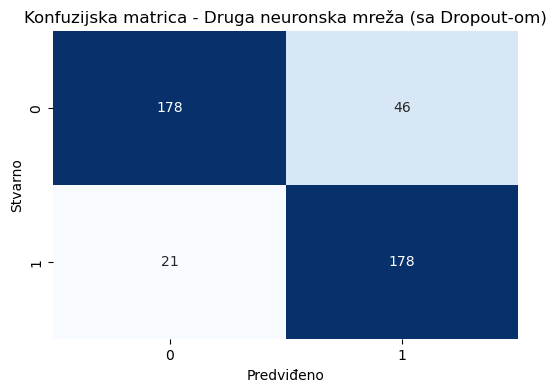

In [52]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# DRUGA NEURONSKA MREŽA (SA DROPOUT-OM)

# Definicija mreže
model2 = Sequential()
model2.add(Dense(input_dim=X_train_scaled.shape[1], units=128))
model2.add(Dropout(0.3))
model2.add(Dense(units=64, activation='tanh'))
model2.add(Dropout(0.3))
model2.add(Dense(units=32, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(units=1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train_scaled, y_train, batch_size=32, epochs=20, verbose=1)

y_pred2 = (model2.predict(X_test_scaled) > 0.5).astype(int)
y_pred2 = y_pred2.reshape(1, -1)[0]

acc2 = accuracy_score(y_test, y_pred2)
print(f"\nTočnost druge neuronske mreže (sa Dropout-om): {acc2:.2%}")

# Konfuzijska matrica
cm2 = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Konfuzijska matrica - Druga neuronska mreža (sa Dropout-om)")
plt.xlabel('Predviđeno')
plt.ylabel('Stvarno')
plt.show()
